In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Example: Building a matrix
Suppose we want to build a matrix $A$ with elements $a_{0j}=10$ and $a_{ij} = (-1)^{i+j}$ for $j=1,\cdots, n$.

The easiest way to get started with building arrays is to use loops and set each element one at a time.

In [ ]:
## We start by building a 2D array
n = 3


A = zeros((n+1, n+1)) ## this creates a array with (n+1)x(n+1) values, all set to zero
print('initialization of the array to zeros')
print(A)
for i in arange(n+1):
    for j in arange(n+1):
        A[i, j] = (-1.)**(i + j)
print('matrix with the wrong first row')
print(A)

## Change the first row to the value 10
print('print just the first row')
print(A[0, :]) # the ':' is a wildcard for the full row (this is 'slicing' see below)
A[0, :] = 10.

print('the full matrix with correct 1st row')
print(A)

initialization of the array to zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
matrix with the wrong first row
[[ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
print just the first row
[ 1. -1.  1. -1.]
the full matrix with correct 1st row
[[10. 10. 10. 10.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]


Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.

In [ ]:
print('first column')
print(A[:, 0]) ## first column

print('first 3 columns')
print(A[:, :3])
#print(A[:, 0:3]) ## same thing

print('1st and 2nd row')
print(A[:2, :])
#print(A[0:2, :]) ## same thing

print('3rd and 4th row')
print(A[2:4, :])

print('skipping every other element')
print(A[0, 1::2])  # every other element, starting at index 1
print(A[1, 1::2])
print(A[1, 0::2])

first column
[10. -1.  1. -1.]
first 3 columns
[[10. 10. 10.]
 [-1.  1. -1.]
 [ 1. -1.  1.]
 [-1.  1. -1.]]
1st and 2nd row
[[10. 10. 10. 10.]
 [-1.  1. -1.  1.]]
3rd and 4th row
[[ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
skipping every other element
[10. 10.]
[1. 1.]
[-1. -1.]


## Setting the diagonal elements of an array
The identity matrix can be constructed with the `eye` function, but here is a way to do it using loops.

In [ ]:
B = zeros((n+1, n+1))
print('initialize to all zeros')
print(B)
for i in arange(n+1):
    B[i, i] = 1. ## you can use this method to set the diagonal elements to any values!
print('finished identity matrix')
print(B)

print('try out matrix-matrix multiplication')
print(B@A)
print('very different result with default multiplication')
print(B*A)

initialize to all zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
finished identity matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
try out matrix-matrix multiplication
[[10. 10. 10. 10.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
very different result with default multiplication
[[10.  0.  0.  0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0. -0.  1.]]


# Example: solving a linear system of equations

In [ ]:
A = rand(5, 5) ## a 5 x 5 array with random values in [0, 1]
b = ones(5)  ## vector filled one values of one
x = solve(A, b) ## the Python function for solving linear systems

print(x)

[ 0.85856045  2.29893019 -0.06976096 -1.01516677 -0.51408726]


# Example: Roots of Lagrange polynomials
Let $p_j = p(x_j)$ for nodes $x_j$ and let $w_j$ be the barycentric weights.  Define the matrices
$$ A = \begin{bmatrix}
      0 & -p^T \\
      w & X
    \end{bmatrix}, \quad  X_{ij} =  \begin{cases}
      0, & i \neq j \\
      x_i & i = j
    \end{cases}
$$

$$
    B =
    \begin{bmatrix}
      0 &  \\
       & I
    \end{bmatrix}
$$
The roots $\hat{x}$ of the polynomial $p(x)$ are the generalized eigenvectors of the characteristic equation $\det(\hat{x} B - A) = 0$.

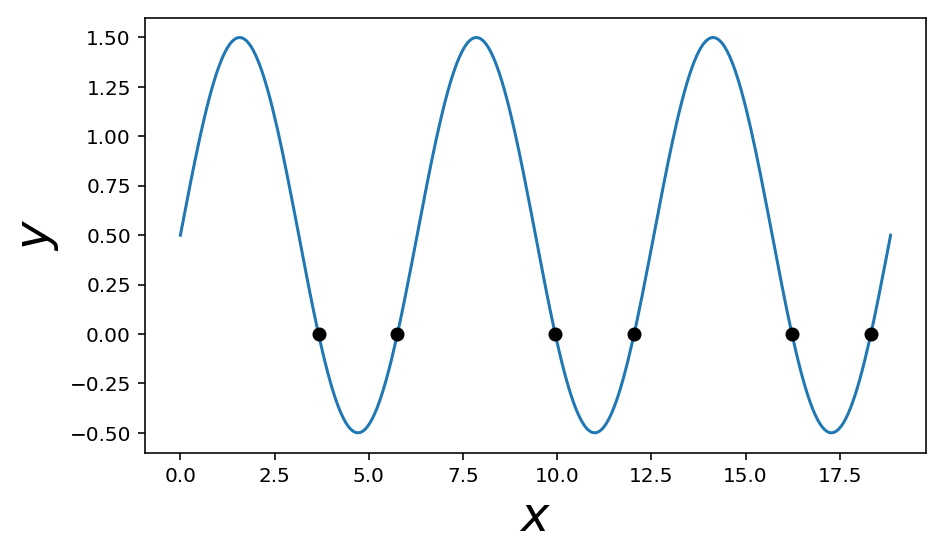

In [ ]:
import scipy.linalg
def baryfit_chebyshev(n):
    j = arange(n+1)
    w = (-1.)**j
    w[0] = w[0]*0.5
    w[-1] = w[-1]*0.5
    return w
def chebyshev_nodes(a, b, n):
    j = arange(n+1)
    return (a + b)/2 - (b - a)/2*cos(j*pi/n)
def baryeval(x, xnodes, ynodes, weights):
    n = xnodes.size - 1
    m = x.size
    numerator = zeros(m)
    denominator = zeros(m)
    for k in arange(m): ## loop over each evaluation point in `x`
        for j in arange(n+1): # j = 0, 1, ..., n
            if x[k] == xnodes[j]: # check if x = x_j
                numerator[k] = ynodes[j] ## p(x_j) = y_j
                denominator[k] = 1.
                break ## this will end the inner-most loop (skip to the next value of k)
            numerator[k] = numerator[k] + ynodes[j]*weights[j]/(x[k] - xnodes[j])
            denominator[k] = denominator[k] + weights[j]/(x[k] - xnodes[j])
    p_of_x = numerator/denominator
    return p_of_x


n = 50
a = 0
b = 6*pi

weights = baryfit_chebyshev(n)
xnodes = chebyshev_nodes(a, b, n)
ynodes = sin(xnodes) + 0.5

xeval = linspace(a, b, 301)
yeval = baryeval(xeval, xnodes, ynodes, weights)

A = zeros((n+2, n+2))
A[1:, 0] = weights
A[0, 1:] = -ynodes
for i in arange(1, n+2):
    A[i, i] = xnodes[i-1]

B = eye(n+2) ## builds the identity matrix
B[0, 0] = 0

L, _ = scipy.linalg.eig(A, b=B)  ## computes the generalized eigenvalues

## Next we filter out everything but the roots we need: finite, real, in [a, b]
logical_is_finite = isfinite(L) ## there is a special function to check for finite vals
L_finite = L[logical_is_finite] ## we use logical indexing
logical_imaginary_part_is_zero = absolute(L_finite.imag) <= 1e-14
L_isreal = L_finite.real[logical_imaginary_part_is_zero]
logical_is_in_a_to_b = (L_isreal >= a - 1e-13) & (L_isreal <= b + 1e-13)
xroots = L_isreal[logical_is_in_a_to_b]

figure(1, [7, 4])
plot(xeval, yeval)
plot(xroots, 0*xroots, 'ko')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);